In [1]:
# importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.models import load_model
import os

In [2]:
# loading the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

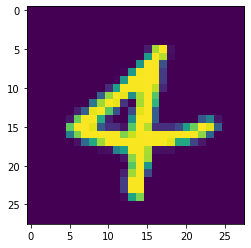

4


In [5]:
# showing a single image
plt.imshow(X_train[150])
plt.show()

# corresponding label
print(y_train[150])

In [6]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
# scaling the values (normalization)
X_train = X_train / 255
X_test = X_test / 255

In [8]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [58]:
# Building Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])


In [59]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
)

In [60]:
#training the neural network
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2892 - accuracy: 0.9166
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1291 - accuracy: 0.9614
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0949 - accuracy: 0.9716
Epoch 4/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0769 - accuracy: 0.9760
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0634 - accuracy: 0.9802
Epoch 6/40
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0552 - accuracy: 0.9826
Epoch 7/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0483 - accuracy: 0.9845
Epoch 8/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0422 - accuracy: 0.9862
Epoch 9/40
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0374 - accuracy: 0.9877
Epoch 10/40
1875/1875 [==============================] - 12s 7ms/step - loss

In [61]:
model.save('model_40.h5')

In [62]:
model = load_model('model_40.h5')

In [63]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1955 - accuracy: 0.9746


In [64]:

print(accuracy)

0.9746000170707703


Accuracy: 97.46%

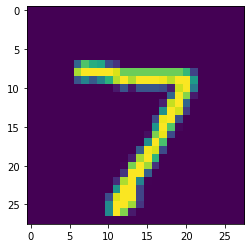

In [65]:
plt.imshow(X_test[0])
plt.show()

In [66]:
print(y_test[0])

7


In [67]:
# Making prediction on X_test
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [68]:
print(y_pred[0])

[3.0598336e-11 2.7742200e-07 1.5413732e-05 8.4424210e-01 4.9555546e-16
 2.2058364e-12 2.1596200e-29 1.0000000e+00 1.6973040e-08 1.8720642e-01]


In [69]:
# Converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [85]:
# Converting the prediction probabilities to class label for all test cases
y_pred_labels = [np.argmax(i) for i in  y_pred]
#print(y_pred_labels)

y_test --> True Labels
y_pred_labels --> Predicted Labels

In [71]:
# Building Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 962    1    1    2    1    3    3    1    1    5]
 [   0 1122    2    2    0    1    3    2    3    0]
 [   5    6  999    3    4    0    3    8    2    2]
 [   0    0    4  988    0    3    0    6    6    3]
 [   0    0    5    0  957    0    3    4    1   12]
 [   2    0    0   35    2  847    2    0    3    1]
 [   4    1    0    0    9   11  931    0    2    0]
 [   1    3   11    2    2    0    0 1000    0    9]
 [   3    1    3   10    7    9    1    4  930    6]
 [   1    3    0    6   13    4    0    4    1  977]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'predicted Labels')

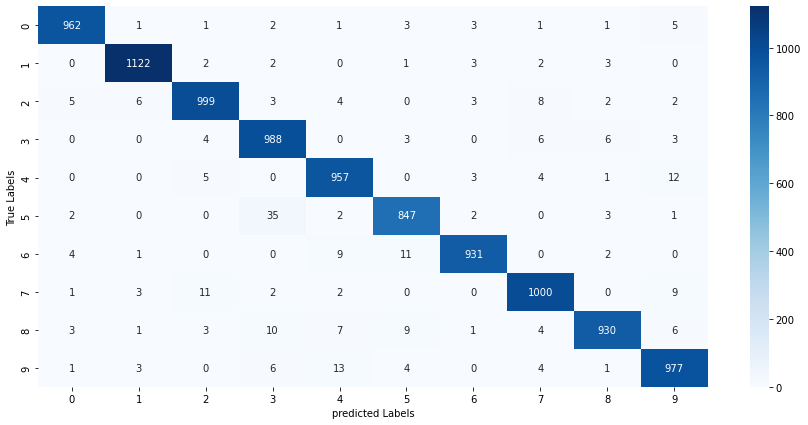

In [72]:
# Ploting Confusion Matrix
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel("predicted Labels")

In [73]:
# Building a predictive system
input_image_path = 'MNIST_digit.png'

input_image = cv2.imread(input_image_path, 0)
type(input_image)
cv2.imshow('test image', input_image)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [74]:
input_image.shape

(318, 318)

In [75]:
input_image_resized = cv2.resize(input_image, (28,28))

In [76]:
input_image_resized = input_image_resized / 255

In [77]:
input_image_reshaped = np.reshape(input_image_resized, [1, 28, 28]) # single test data

In [78]:
input_prediction = model.predict(input_image_reshaped)

1/1 [==============================] - 0s 28ms/step


In [79]:
print(np.argmax(input_prediction))

3


In [ ]:
# The Predictive Ststem

# image acquisition
input_image_path = input('Enter the path to image ') # test_input.png

input_image = cv2.imread(input_image_path, 0)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.show()


# preprocessing
input_image_resized = cv2.resize(input_image, (28,28))
input_image_resized = input_image_resized / 255 
input_image_reshaped = np.reshape(input_image_resized, [1, 28, 28]) 

# prediction
input_prediction = model.predict(input_image_reshaped)
print('The Handwritten Digit is recognized as : ', np.argmax(input_prediction))

ResNet50 Model

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.models import Sequential,Model,load_model
from keras.optimizers import SGD, Adam

In [8]:
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = mnist.load_data()

In [9]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [14]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.


# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 10).T
Y_test = convert_to_one_hot(Y_test_orig, 10).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28)
Y_train shape: (60000, 10)
X_test shape: (10000, 28, 28)
Y_test shape: (10000, 10)


In [31]:
X_train_ck = X_train
X1 = []
for i in X_train_ck:
    tmp = np.zeros((4,28))

    i = np.vstack((i,tmp))

    tmp = np.zeros((32,4))
    i = np.hstack((i, tmp))
    X1.append(i)
    
X_test_ck = X_test
X2 = []
for i in X_test_ck:
    tmp = np.zeros((4,28))

    i = np.vstack((i,tmp))

    tmp = np.zeros((32,4))
    i = np.hstack((i, tmp))
    X2.append(i)

In [33]:
X1 = np.array(X1)
X2 = np.array(X2)
X2.shape

(10000, 32, 32)

In [34]:
img_height,img_width = 32,32
num_classes = 10
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,1))

In [37]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [48]:
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(X1, Y_train, epochs = 25, batch_size=64)

Epoch 1/25
938/938 [==============================] - 4246s 5s/step - loss: 0.3920 - accuracy: 0.8977
Epoch 2/25
938/938 [==============================] - 3824s 4s/step - loss: 0.1266 - accuracy: 0.9647
Epoch 3/25
938/938 [==============================] - 3768s 4s/step - loss: 0.0775 - accuracy: 0.9776
Epoch 4/25
938/938 [==============================] - 3768s 4s/step - loss: 0.0540 - accuracy: 0.9847
Epoch 5/25
347/938 [==========>...................] - ETA: 40:36 - loss: 0.0605 - accuracy: 0.9836

KeyboardInterrupt: 

In [50]:
model.save("resnet_04e.h5")

In [58]:
res_model = load_model("resnet_04e.h5")

In [51]:
loss, accuracy = model.evaluate(X2, Y_test)

313/313 [==============================] - 38s 114ms/step - loss: 0.1725 - accuracy: 0.9581


In [52]:
print(accuracy)

0.9581000208854675


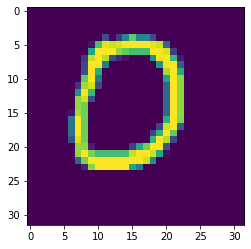

In [57]:
plt.imshow(X2[10])
plt.show()

In [56]:
print(np.argmax(Y_test[10]))

0


In [ ]:
# The Predictive Ststem

# image acquisition
input_image_path = input('Enter the path to image ') # test_input.png

input_image = cv2.imread(input_image_path, 0)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.show()


# preprocessing
input_image_resized = cv2.resize(input_image, (32,32))
input_image_resized = input_image_resized / 255 
input_image_reshaped = np.reshape(input_image_resized, [1, 32, 32]) 

# prediction
input_prediction = res_model.predict(input_image_reshaped)
print('The Handwritten Digit is recognized as : ', np.argmax(input_prediction))

In [62]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 1)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   3200        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 8, 8, 256)    16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 4, 4, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [7]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [12]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [14]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [3]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        model.save("cnn_model.h5")
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [16]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    cnn_model = load_model("cnn_model.h5")
    scores, histories = evaluate_model(trainX, trainY)
    print(scores)
    

In [ ]:
# entry point, run the test harness
run_test_harness()

> 98.517


In [3]:
def model_result(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # load model
        model = load_model("cnn_model.h5")
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [ ]:
scores, histories = cnn_model.evaluate()